In [5]:
import pandas as pd
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [191]:
data = pd.read_csv("/home/nikoleta/src/jobs/data/ch3_experiment/after_analysis/ratio-lfifty.csv")

In [193]:
title = 'Periodic Latice'
size = '50'

In [194]:
anova = pd.DataFrame({'ratio' : data.ratio, 'frequency' : data.frequency}) 

In [195]:
k = anova.frequency.unique()
k.sort()
k

array([270, 280, 290, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400,
       410, 420, 430, 440, 450, 460, 470, 570])

In [196]:
grouped = anova.groupby(["frequency"])
temp = pd.DataFrame({col:vals['ratio'] for col,vals in grouped})
meds = temp.median()
temp = temp[meds.index]

/home/nikoleta/.local/lib/python3.5/site-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


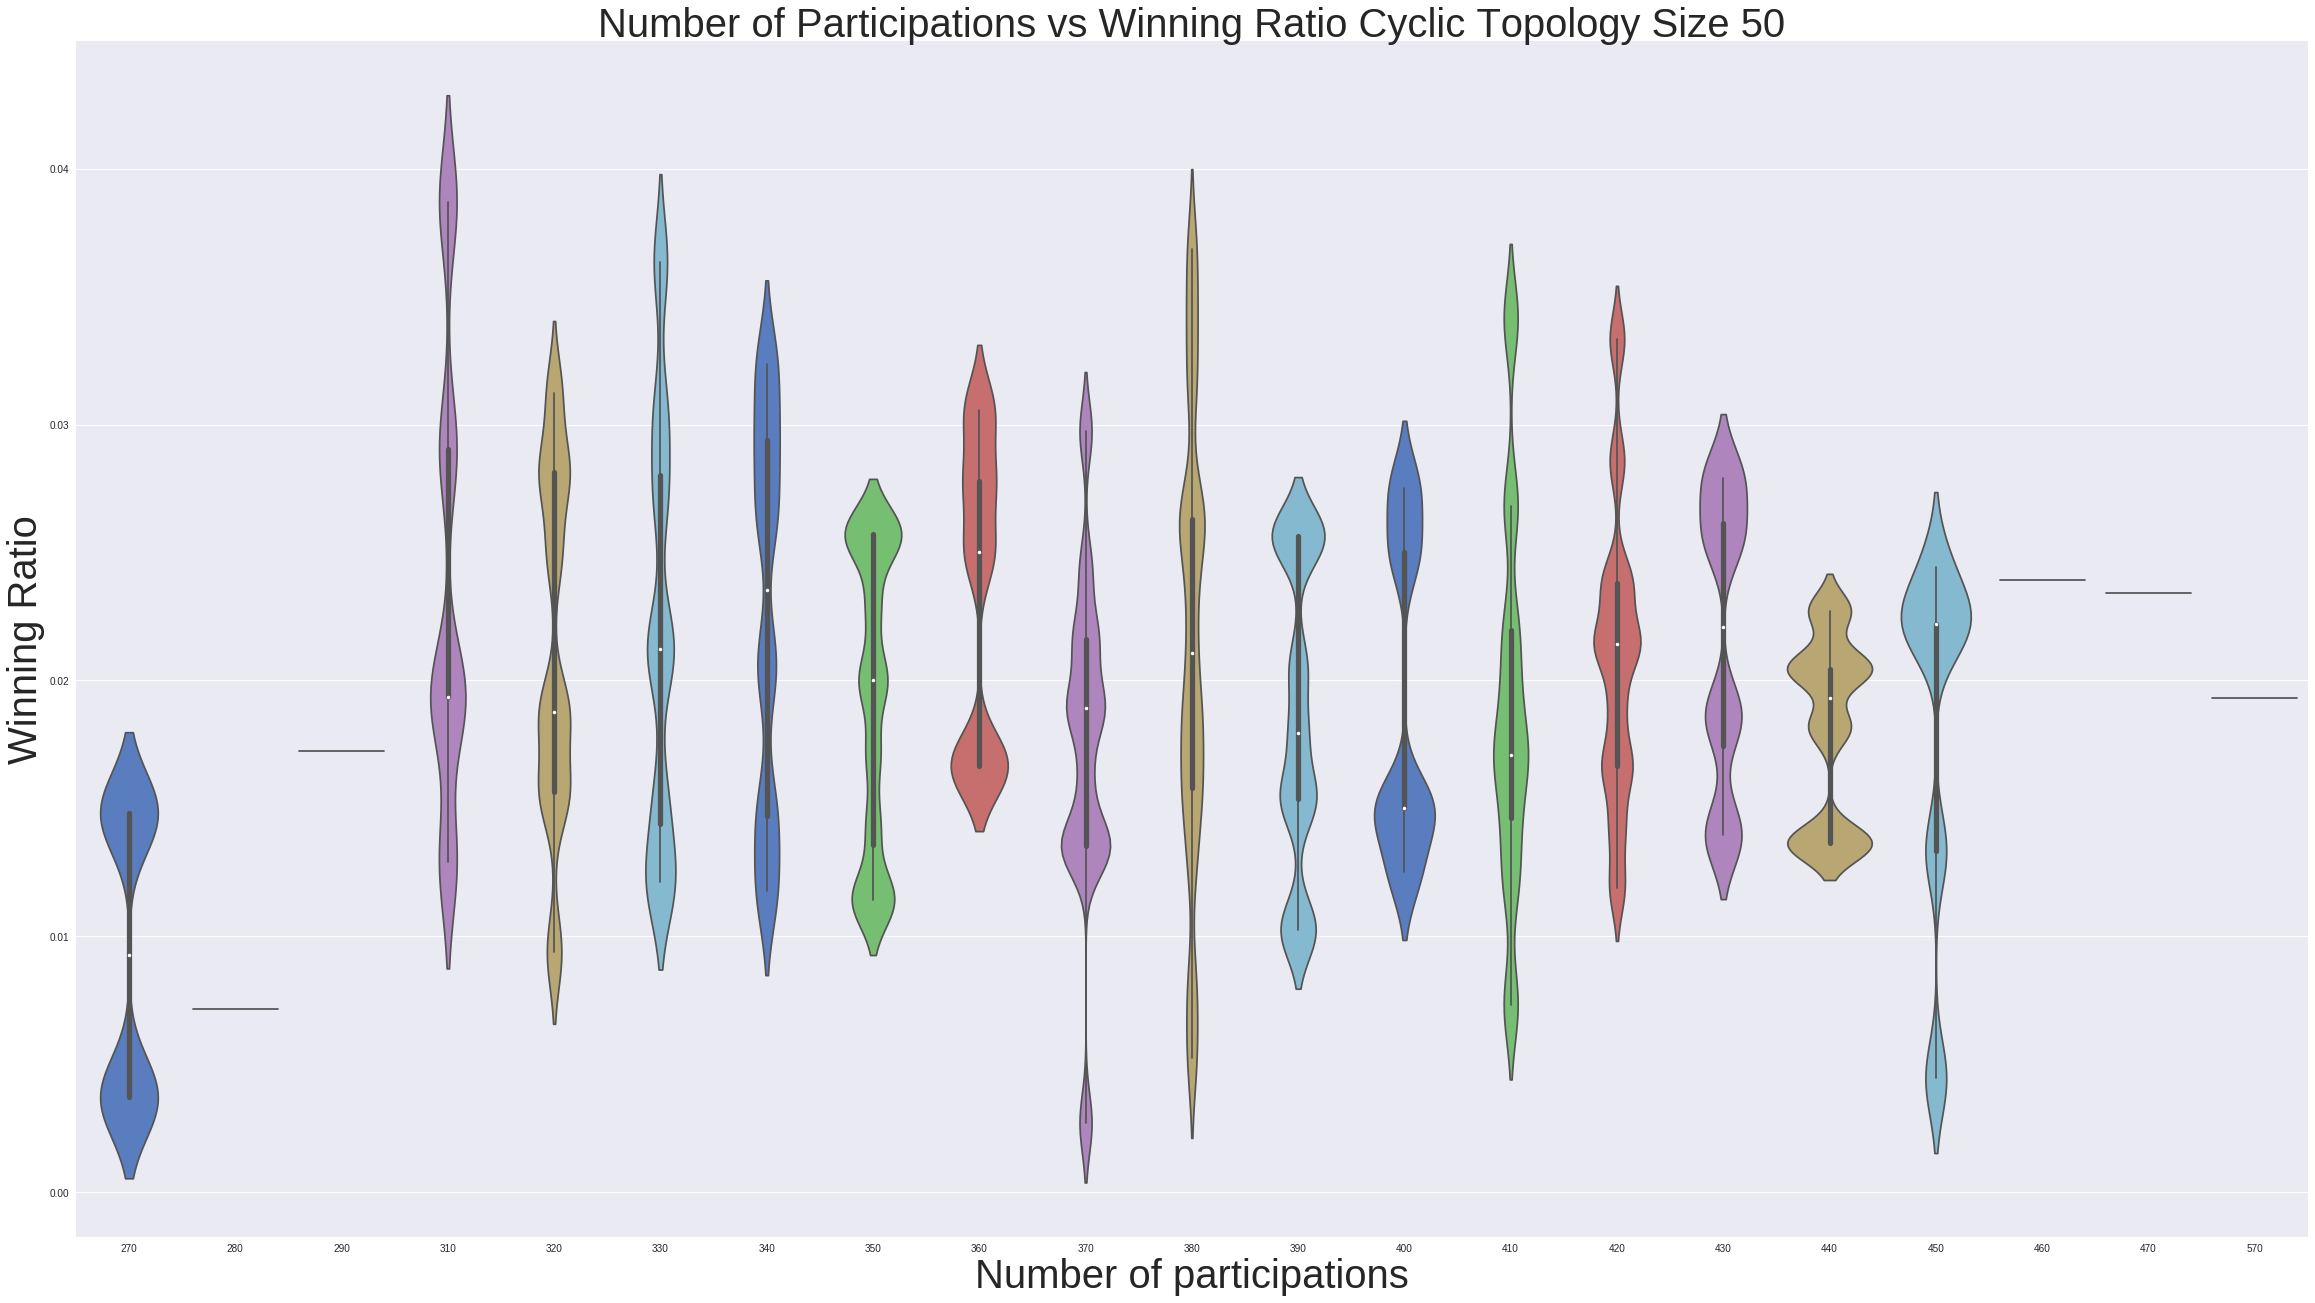

In [188]:
figure = plt.figure(figsize=(40, 22))
sns.violinplot(temp, withd= 100, palette="muted")
plt.xlabel('Number of participations', fontsize = 40)
plt.ylabel('Winning Ratio', fontsize = 40)
plt.title('Number of Participations vs Winning Ratio {} Topology Size {}'.format(title,size) , fontsize=40)
plt.savefig("/home/nikoleta/src/jobs/images/participation-ratio-violin-{}-{}.pdf".format(title,size), format='pdf', bbox_inches='tight')

In [197]:
temp.describe()

/usr/local/lib/python3.5/dist-packages/numpy-1.11.1rc1-py3.5-linux-x86_64.egg/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,270,280,290,310,320,330,340,350,360,370,...,390,400,410,420,430,440,450,460,470,570
count,540.000000,2.800000e+02,290.000000,1550.000000,2880.000000,2640.000000,2040.000000,4200.000000,1800.000000,4810.000000,...,3510.000000,2000.000000,3690.000000,5040.000000,1720.000000,2640.000000,2700.000000,460.000000,940.000000,570.000000
mean,0.012963,1.785714e-02,0.027586,0.016129,0.019097,0.018939,0.019608,0.018095,0.021667,0.019751,...,0.019373,0.021000,0.026016,0.017857,0.023837,0.023106,0.021852,0.019565,0.019149,0.017544
std,0.009268,3.475659e-18,0.000000,0.004999,0.004282,0.004483,0.005281,0.007409,0.002079,0.006033,...,0.006850,0.004638,0.005750,0.005953,0.005298,0.005477,0.003723,0.000000,0.006386,0.000000
min,0.003704,1.785714e-02,0.027586,0.012903,0.012500,0.012121,0.008824,0.002857,0.019444,0.013514,...,0.012821,0.012500,0.017073,0.004762,0.018605,0.015909,0.015556,0.019565,0.012766,0.017544
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,0.022222,1.785714e-02,0.027586,0.025806,0.028125,0.027273,0.023529,0.031429,0.025000,0.029730,...,0.035897,0.025000,0.036585,0.028571,0.032558,0.031818,0.026667,0.019565,0.025532,0.017544


In [198]:
mod = ols('ratio ~ frequency',data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)

print (aov_table)

             sum_sq       df           F         PR(>F)
frequency  0.045953      1.0  1110.45148  7.777650e-241
Residual   2.069017  49998.0         NaN            NaN


In [199]:
# The Anova:
alpha = 0.05

if 7.777650e-241 < alpha:
    print("The difference between the distributions is statistically significant at the {} level.".format(alpha))
else:
    print("The difference between the distributions is NOT statistically significant at the {} level.".format(alpha))

The difference between the distributions is statistically significant at the 0.05 level.
